### Baby PCA

In [223]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [224]:
X_row = np.array([[1, 2, 0], [7.2, 5, 9], [-3, 100, 5.8],
              [1, -90, 9.7], [2, 88, 1.2]])
X = StandardScaler().fit_transform(X_row)
X_cov = np.cov(X.T)
print('The covariance matrix of X is:\n')
print(X_cov)

The covariance matrix of X is:

[[ 1.25       -0.38718623  0.33594935]
 [-0.38718623  1.25       -0.62723405]
 [ 0.33594935 -0.62723405  1.25      ]]


In [225]:
variance, PCs = np.linalg.eig(X_cov)
print('\nPC matrix\n')
print(PCs)
print('\nVariances')
print(str(variance.T) + '\n')


PC matrix

[[ 0.48868501 -0.86827057  0.08540006]
 [-0.62499377 -0.28009519  0.72864907]
 [ 0.6087444   0.40945439  0.67954202]]

Variances
[2.16366884 0.96667249 0.61965867]



In [226]:
PCs.dot(PCs.T)

array([[ 1.00000000e+00, -1.16706233e-16,  9.31819375e-17],
       [-1.16706233e-16,  1.00000000e+00,  2.22687588e-16],
       [ 9.31819375e-17,  2.22687588e-16,  1.00000000e+00]])

#### The diagonal of U*Ut is 1, rest are almost equal to zero. So we can say this is the orthogonal matrix.

In [227]:
pca = PCA()
pca.fit(X)
newdata = pca.transform(X)
X_original = pca.inverse_transform(newdata)
X_original

array([[-0.19585149, -0.27615812, -1.30076987],
       [ 1.70145983, -0.23255421,  0.97684274],
       [-1.41992331,  1.14823641,  0.16702492],
       [-0.19585149, -1.61334483,  1.15399039],
       [ 0.11016646,  0.97382075, -0.99708819]])

In [228]:
X

array([[-0.19585149, -0.27615812, -1.30076987],
       [ 1.70145983, -0.23255421,  0.97684274],
       [-1.41992331,  1.14823641,  0.16702492],
       [-0.19585149, -1.61334483,  1.15399039],
       [ 0.11016646,  0.97382075, -0.99708819]])

In [229]:
PCA().fit(X).components_

array([[ 0.48868501, -0.62499377,  0.6087444 ],
       [-0.86827057, -0.28009519,  0.40945439],
       [-0.08540006, -0.72864907, -0.67954202]])

In [230]:
def SVDtoPCA(x):
    U, Sigma, Vh = np.linalg.svd(x, full_matrices=False)
    n = x.shape[0]
    S2PCA = np.square(Sigma) / (n - 1)
    return U, S2PCA, Vh


u, s, v = SVDtoPCA(X)
s

array([2.16366884, 0.96667249, 0.61965867])

In [231]:
u

array([[-0.24302427,  0.14503902,  0.69988456],
       [ 0.53417163,  0.51475932, -0.4062964 ],
       [-0.44524557, -0.4981978 , -0.52649717],
       [ 0.54900415, -0.55657758,  0.25921702],
       [-0.39490594,  0.39497704, -0.02630801]])

In [232]:
v

array([[ 0.48868501, -0.62499377,  0.6087444 ],
       [ 0.86827057,  0.28009519, -0.40945439],
       [-0.08540006, -0.72864907, -0.67954202]])

### PCA for car dealers

In [233]:
def pca_eigenvalue_decomposition(X):
    from sklearn.decomposition import PCA
    from sklearn.preprocessing import StandardScaler
    X_ = StandardScaler().fit_transform(X)
    pca = PCA(n_components=X_.shape[1])
    pca.fit(X_)
    variances = pca.explained_variance_
    ratios = pca.explained_variance_ratio_
    pc = pca.components_
    newdata = pca.transform(X_)
    return pc.T, variances, ratios, newdata

In [234]:
a, b, c, d = pca_eigenvalue_decomposition(X_row)

In [235]:
print('PCs for X data')
print(a)

PCs for X data
[[ 0.48868501 -0.86827057 -0.08540006]
 [-0.62499377 -0.28009519 -0.72864907]
 [ 0.6087444   0.40945439 -0.67954202]]


In [236]:
print('Variance for X data')
print(b)

Variance for X data
[2.16366884 0.96667249 0.61965867]


In [283]:
import pandas as pd
vehicles = pd.read_csv('vehicles.csv')
vehicles.shape

(387, 18)

In [284]:
vehicles.head()

Sports  SUV  Wagon  Minivan  Pickup  AWD  RWD  \
Acura 3.5 RL                  0    0      0        0       0    0    0   
Acura 3.5 RL Navigation       0    0      0        0       0    0    0   
Acura MDX                     0    1      0        0       0    1    0   
Acura NSX S                   1    0      0        0       0    0    1   
Acura RSX                     0    0      0        0       0    0    0   

                         Retail  Dealer  Engine  Cylinders  Horsepower  \
Acura 3.5 RL              43755   39014     3.5          6         225   
Acura 3.5 RL Navigation   46100   41100     3.5          6         225   
Acura MDX                 36945   33337     3.5          6         265   
Acura NSX S               89765   79978     3.2          6         290   
Acura RSX                 23820   21761     2.0          4         200   

                         CityMPG  HighwayMPG  Weight  Wheelbase  Length  Width  
Acura 3.5 RL                  18          24    3880        115     197     72  
Acura 3.5 RL Navigation       18          24    3893        115     197     72  
Acura MDX                     17          23    4451        106     189     77  
Acura NSX S                   17          24    3153        100     174     71  
Acura RSX                     24          31    2778        101     172     68

In [238]:
data = vehicles.iloc[:,7:19]
data.describe()

Retail         Dealer      Engine   Cylinders  Horsepower  \
count     387.000000     387.000000  387.000000  387.000000  387.000000   
mean    33231.180879   30440.653747    3.127390    5.757106  214.444444   
std     19724.634576   17901.179282    1.014314    1.490182   70.262822   
min     10280.000000    9875.000000    1.400000    3.000000   73.000000   
25%     20997.000000   19575.000000    2.300000    4.000000  165.000000   
50%     28495.000000   26155.000000    3.000000    6.000000  210.000000   
75%     39552.500000   36124.000000    3.800000    6.000000  250.000000   
max    192465.000000  173560.000000    6.000000   12.000000  493.000000   

          CityMPG  HighwayMPG       Weight   Wheelbase      Length       Width  
count  387.000000  387.000000   387.000000  387.000000  387.000000  387.000000  
mean    20.312661   27.263566  3532.457364  107.211886  184.961240   71.276486  
std      5.262333    5.636005   706.003622    7.086553   13.237999    3.368329  
min     10.000000   12.000000  1850.000000   89.000000  143.000000   64.000000  
25%     18.000000   24.000000  3107.000000  103.000000  177.000000   69.000000  
50%     19.000000   27.000000  3469.000000  107.000000  186.000000   71.000000  
75%     21.500000   30.000000  3922.000000  112.000000  193.000000   73.000000  
max     60.000000   66.000000  6400.000000  130.000000  221.000000   81.000000

In [239]:
from sklearn.preprocessing import scale
data = pd.DataFrame(scale(data), index=data.index, columns=data.columns)

pca_loadings = pd.DataFrame(PCA().fit(data).components_.T, index=data.columns, 
                            columns=['V1', 'V2', 'V3', 'V4', 'V5',
                                'V6', 'V7', 'V8', 'V9', 'V10', 'V11'])
print('PCs for vehicles data')
pca_loadings

PCs for vehicles data


V1        V2        V3        V4        V5        V6  \
Retail     -0.263750  0.468509  0.254974  0.279884  0.049745  0.032493   
Dealer     -0.262319  0.470147  0.257250  0.287720  0.036820  0.048558   
Engine     -0.347080 -0.015347  0.047194 -0.525371  0.051995  0.005367   
Cylinders  -0.334189  0.078032  0.081449 -0.639800 -0.125729  0.092894   
Horsepower -0.318602  0.292213  0.076381 -0.058343 -0.119917 -0.208118   
CityMPG     0.310482 -0.003366  0.535063 -0.186276  0.325728  0.248202   
HighwayMPG  0.306589 -0.010964  0.598998 -0.125744  0.039747 -0.081732   
Weight     -0.336329 -0.167464 -0.112219  0.119546  0.397217  0.541583   
Wheelbase  -0.266210 -0.418177  0.264453  0.220704 -0.224878  0.449968   
Length     -0.256790 -0.408411  0.344708  0.168494 -0.456315 -0.314059   
Width      -0.296055 -0.312891  0.087592  0.090657  0.662589 -0.530957   

                  V7        V8        V9       V10       V11  
Retail     -0.222420 -0.051733  0.090698  0.024223  0.709294  
Dealer     -0.219444 -0.066925  0.086684  0.028297 -0.704647  
Engine     -0.051724  0.358462  0.683332 -0.010997 -0.009551  
Cylinders  -0.239974 -0.423252 -0.452827 -0.004141  0.003858  
Horsepower  0.813529  0.180258 -0.227459  0.010575 -0.001001  
CityMPG     0.092549  0.166249 -0.119762  0.603613  0.000470  
HighwayMPG  0.056874 -0.004478  0.010064 -0.720868 -0.002664  
Weight     -0.037745  0.417050 -0.335965 -0.304350 -0.002014  
Wheelbase   0.299474 -0.458409  0.284378  0.041368  0.012931  
Length     -0.277516  0.406365 -0.228687  0.136883 -0.002548  
Width       0.018887 -0.275417  0.006362  0.035872 -0.009024

In [240]:
pca = PCA()
df_plot = pd.DataFrame(pca.fit_transform(data), 
                       columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5',
                                'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11'],
                      index=data.index)
print('New data')
df_plot.head()

New data


PC1       PC2       PC3       PC4       PC5  \
Acura 3.5 RL            -1.567443 -0.447272  0.287389  0.610650 -0.466259   
Acura 3.5 RL Navigation -1.635648 -0.339732  0.345688  0.679743 -0.448717   
Acura MDX               -1.906619 -0.411139 -0.552696  0.296000  1.236050   
Acura NSX S             -1.590199  3.862579  0.356819  1.149499  0.209765   
Acura RSX                2.654764  0.654451 -0.173374  0.289406 -0.097117   

                              PC6       PC7       PC8       PC9      PC10  \
Acura 3.5 RL             0.326571 -0.171273 -0.028485  0.220583  0.203593   
Acura 3.5 RL Navigation  0.346090 -0.224050 -0.034763  0.235299  0.204167   
Acura MDX               -0.584180  0.195925  0.347985 -0.432825 -0.123108   
Acura NSX S             -0.535761 -0.560921 -0.356993  0.380400  0.200541   
Acura RSX               -0.141422  0.520124  0.060515 -0.013919  0.054835   

                             PC11  
Acura 3.5 RL             0.048293  
Acura 3.5 RL Navigation  0.050473  
Acura MDX               -0.003288  
Acura NSX S              0.073984  
Acura RSX                0.010173

In [260]:
variances = pca.fit(data).explained_variance_
print('Varances of vehicles data')
print(variances)
ratio = pca.fit(data).explained_variance_ratio_
print('\nExplained variance ratio of vehicles data')
print(ratio)
cum_ratio = ratio.cumsum()
print('\nCumulative explained variance ratio of vehicles data')
print(cum_ratio)

Varances of vehicles data
[7.12304423e+00 1.88880540e+00 8.51929654e-01 3.57940400e-01
 2.76149157e-01 1.98456523e-01 1.40883248e-01 8.68632648e-02
 6.65599703e-02 3.70731584e-02 7.92402290e-04]

Explained variance ratio of vehicles data
[6.45876221e-01 1.71265888e-01 7.72480259e-02 3.24559536e-02
 2.50395994e-02 1.79948832e-02 1.27744735e-02 7.87625563e-03
 6.03527097e-03 3.36157838e-03 7.18504308e-05]

Cumulative explained variance ratio of vehicles data
[0.64587622 0.81714211 0.89439013 0.92684609 0.95188569 0.96988057
 0.98265504 0.9905313  0.99656657 0.99992815 1.        ]


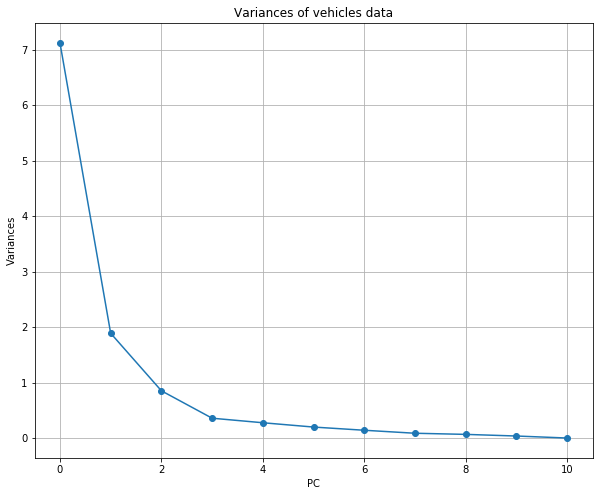

In [242]:
fig = plt.figure(figsize=(10,8))
plt.plot(variances, marker='o')
plt.grid('on')
plt.xlabel('PC')
plt.ylabel('Variances')
plt.title('Variances of vehicles data')
plt.savefig('Variances_Plot',format='tiff',dpi=600)
plt.show()

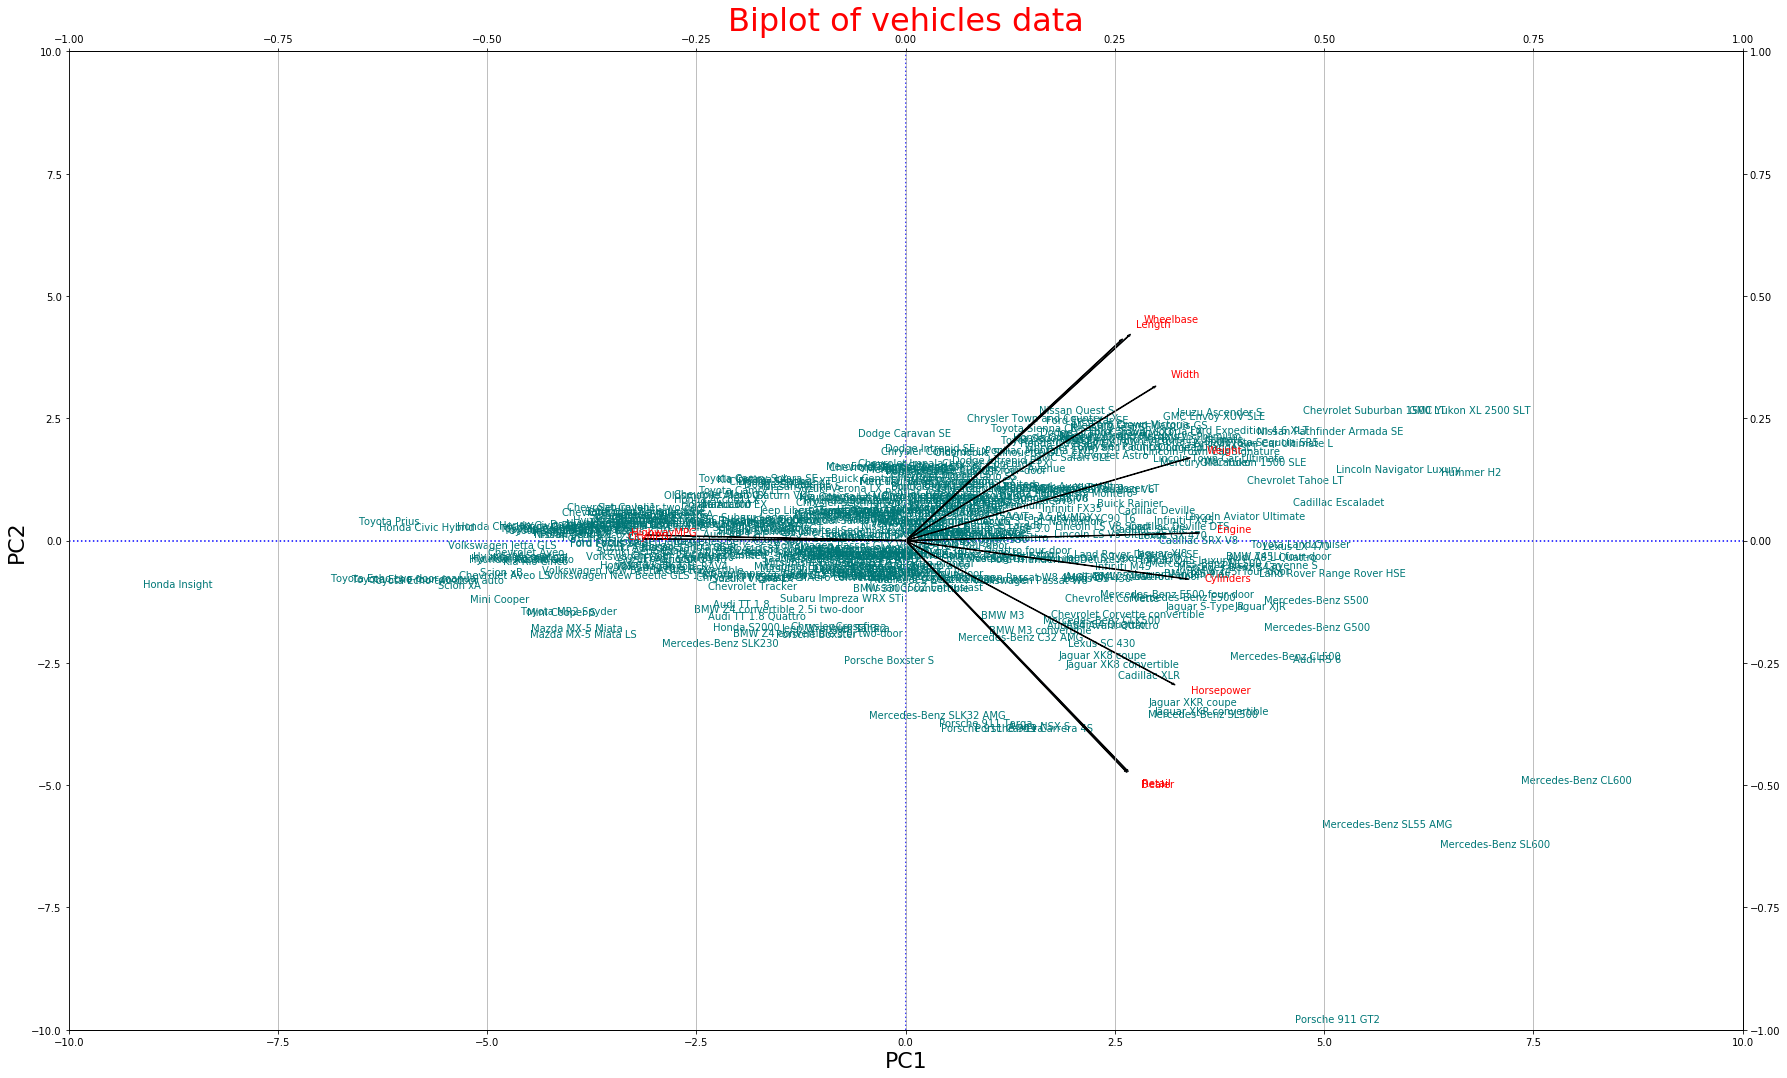

In [243]:
fig , ax1 = plt.subplots(figsize=(30,18))
ax1.set_xlim(-10,10)
ax1.set_ylim(-10,10)
# Plot Principal Components 1 and 2
for i in df_plot.index:
    ax1.annotate(i, (-df_plot.PC1.loc[i], -df_plot.PC2.loc[i]), ha='center', color = '#007777')
# Plot reference lines
ax1.hlines(0,-10,10, linestyles='dotted', colors='blue')
ax1.vlines(0,-10,10, linestyles='dotted', colors='blue')
ax1.set_xlabel('PC1', fontsize = 22)
ax1.set_ylabel('PC2', fontsize = 22)
# Plot Principal Component loading vectors, using a second y-axis.
ax2 = ax1.twinx().twiny()
ax2.set_ylim(-1,1)
ax2.set_xlim(-1,1)
ax2.set_xlabel('Biplot of vehicles data', color='red', fontsize = 32)
# Plot labels for vectors. Variable ’a’ is a small offset parameter to separate arrow tip and text.
a = 1.07
for i in pca_loadings[['V1', 'V2']].index:
    ax2.annotate(i, (-pca_loadings.V1.loc[i]*a, -pca_loadings.V2.loc[i]*a), color='red')
    # Plot vectors
    ax2.arrow(0,0,-pca_loadings.V1[i], -pca_loadings.V2[i])
plt.grid('on')
plt.savefig('Biplot',format='tiff',dpi=600)
plt.show()

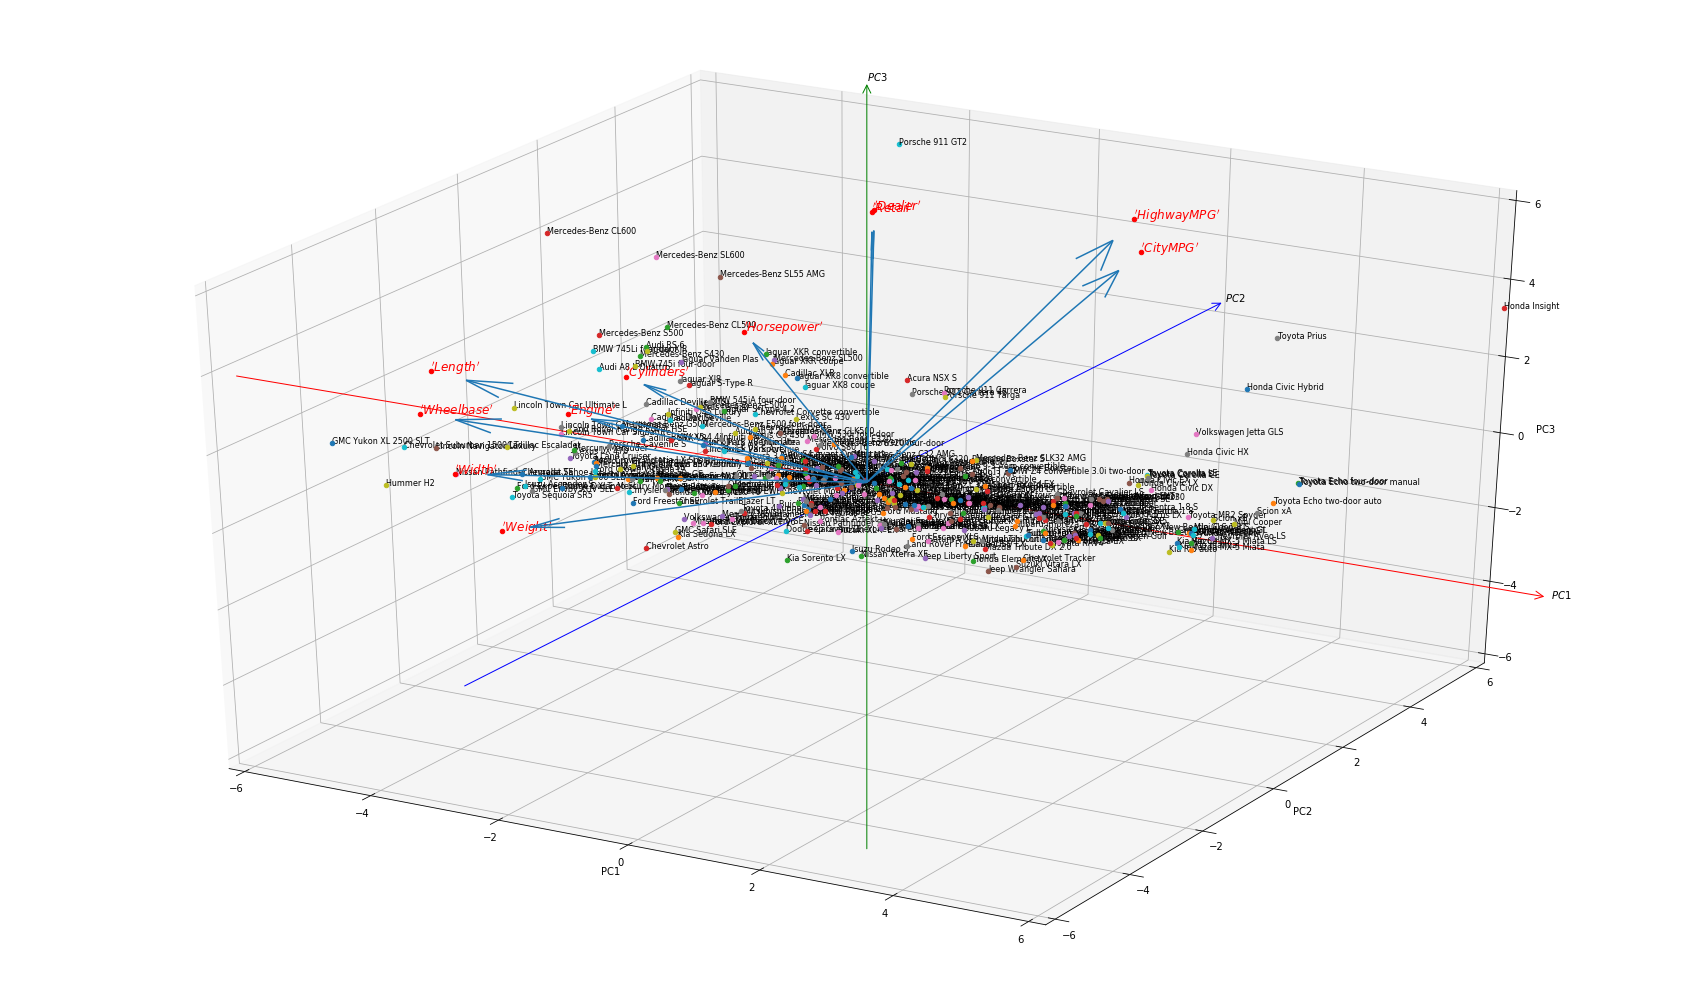

In [244]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d


class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0, 0), (0, 0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0], ys[0]), (xs[1], ys[1]))
        FancyArrowPatch.draw(self, renderer)

if __name__ == '__main__':
    center = [0, 0, 0]
    fig = plt.figure(figsize=(30,18))
    ax1 = fig.add_subplot(111, projection='3d')
    for i in range(len(data.index)):
        x, y, z = df_plot.PC1.iloc[i], df_plot.PC2.iloc[i], df_plot.PC3.iloc[i]
        ax1.scatter(x, y, z)
        ax1.text(x, y, z, '{0}'.format(df_plot.index[i]), size=8)
    ax1.set_xlabel('PC1')
    ax1.set_xlim(-6, 6)
    ax1.set_ylabel('PC2')
    ax1.set_ylim(-6, 6)
    ax1.set_zlabel('PC3')
    ax1.set_zlim(-6, 6)
    a=13
    j = 0
    for i in pca_loadings[['V1', 'V2', 'V3']].index:
        x, y, z = pca_loadings.V1.loc[i], pca_loadings.V2.loc[i], pca_loadings.V3.loc[i]
        ax1.scatter(x * a, y * a, z * a, color='red')

        u, v, w = pca_loadings.V1[i], pca_loadings.V2[i], pca_loadings.V3[i]
        ax1.quiver(0, 0, 0, u, v, w, length=12, arrow_length_ratio=0.1)
        ax1.text(x*a, y*a, z*a, r"$'{0}'$".format(pca_loadings.index[j]), size=12, color='r')
        j += 1

    # Here we create the arrows:
    arrow_prop_dict = dict(mutation_scale=20, arrowstyle='->', shrinkA=0, shrinkB=0)

    a = Arrow3D([-10, 10], [0, 0], [0, 0], **arrow_prop_dict, color='r')
    ax1.add_artist(a)
    a = Arrow3D([0, 0], [-10, 10], [0, 0], **arrow_prop_dict, color='b')
    ax1.add_artist(a)
    a = Arrow3D([0, 0], [0, 0], [-10, 10], **arrow_prop_dict, color='g')
    ax1.add_artist(a)

    # Give them a name:
    ax1.text(10.1, 0, 0, r'$PC1$')
    ax1.text(0, 10.1, 0, r'$PC2$')
    ax1.text(0, 0, 10.1, r'$PC3$')
    
    plt.savefig('Triplot',format='tiff',dpi=600)
    plt.show()

### PCA in Finance

In [285]:
SP = pd.read_csv('SP_2010__baby.csv')
SP.head()

Symbol                 Name                  Sector   Price  Earnings/Share  \
0    MMM           3M Company             Industrials  177.12            7.78   
1    ABT  Abbott Laboratories             Health Care   41.89            1.62   
2   ABBV               AbbVie             Health Care   64.16            3.33   
3    ACN        Accenture plc  Information Technology  115.11            5.92   
4   ATVI  Activision Blizzard  Information Technology   41.29            1.11   

   Book Value  52 week low  52 week high  Market Cap  EBITDA  Price/Sales  
0       19.34       134.00        177.79      107.43    8.57         3.52  
1       14.10        36.00         51.74       61.54    4.40         2.98  
2        2.87        45.45         71.60      103.77   10.30         4.31  
3       11.45        88.43        120.78       71.66    5.42         2.17  
4       11.31        24.04         41.32       30.48    1.59         6.16

In [286]:
sp_data = pd.DataFrame(scale(SP.iloc[:, 3:11]), index=SP.Symbol, columns=SP.columns[3:11])
print('Normalized Finance data')
sp_data.head()

Normalized Finance data


Price  Earnings/Share  Book Value  52 week low  52 week high  \
Symbol                                                                    
MMM     1.116217        0.884112   -0.224455     1.155490      0.877613   
ABT    -0.436660       -0.253379   -0.455029    -0.377006     -0.395335   
ABBV   -0.180929        0.062385   -0.949179    -0.229230     -0.194774   
ACN     0.404142        0.540649   -0.571636     0.442879      0.301883   
ATVI   -0.443550       -0.347554   -0.577796    -0.564033     -0.500564   

        Market Cap    EBITDA  Price/Sales  
Symbol                                     
MMM       1.167454  0.754591     0.173799  
ABT       0.394087  0.116189    -0.016143  
ABBV      1.105773  1.019444     0.451677  
ACN       0.564636  0.272345    -0.301056  
ATVI     -0.129355 -0.314005     1.102405

In [287]:
pca_loadings = pd.DataFrame(PCA().fit(sp_data).components_.T, index=sp_data.columns, 
                            columns=['V1', 'V2', 'V3', 'V4', 'V5','V6', 'V7', 'V8'])
print('PCs for Finance Data')
pca_loadings

PCs for Finance Data


V1        V2        V3        V4        V5        V6  \
Price           0.499993 -0.032503  0.078218 -0.115821 -0.245978  0.018185   
Earnings/Share  0.348796  0.067491 -0.373916 -0.390533  0.761295  0.009915   
Book Value      0.321855 -0.067538 -0.279689  0.882709  0.174376 -0.062804   
52 week low     0.504604 -0.028380  0.054074 -0.115280 -0.222057  0.012283   
52 week high    0.497034 -0.043570  0.055894 -0.111969 -0.292971  0.001230   
Market Cap      0.054251  0.698830  0.107004  0.114170  0.014491  0.695490   
EBITDA          0.019422  0.706177 -0.077174 -0.006578 -0.103555 -0.695814   
Price/Sales     0.140601 -0.008555  0.867403  0.126452  0.428303 -0.166166   

                      V7        V8  
Price          -0.679965  0.454125  
Earnings/Share  0.024608  0.034412  
Book Value     -0.000877  0.009758  
52 week low    -0.069414 -0.821022  
52 week high    0.728842  0.344025  
Market Cap      0.016256  0.005314  
EBITDA         -0.007321  0.001584  
Price/Sales     0.026346  0.005530

In [288]:
pca = PCA()
df_pcs = pd.DataFrame(pca.fit_transform(sp_data), 
                       columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8'],
                      index=sp_data.index)
print('New data of Finance Data')
df_pcs.head()

New data of Finance Data


PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
Symbol                                                                         
MMM     1.915929  1.314758  0.148478 -0.753853 -0.141119  0.316451 -0.159569   
ABT    -0.818526  0.413336  0.164571 -0.122217  0.021470  0.208927  0.034240   
ABBV   -0.443385  1.577980  0.636148 -0.616366  0.138360  0.038542  0.021757   
ACN     0.573778  0.625722 -0.191581 -0.822790 -0.123247  0.307644 -0.072461   
ATVI   -0.920492 -0.253771  1.165009 -0.075154  0.518462 -0.037426 -0.002888   

             PC8  
Symbol            
MMM    -0.103266  
ABT    -0.035743  
ABBV    0.041905  
ACN    -0.061434  
ATVI    0.076763

In [249]:
print('Top 20 stockes with largest PC1 values')
df_pcs.PC1.abs().sort_values(ascending=False)[0:20]

Top 20 stockes with largest PC1 values


Symbol
PCLN    26.709767
ISRG    12.093318
CMG      8.581186
REGN     7.076570
EQIX     5.597386
MHK      5.527677
ICE      5.428250
ESS      4.122115
GS       4.094974
PSA      4.023767
SHW      3.947978
ORLY     3.773174
DVN      3.314992
AYI      3.152475
GWW      3.147842
LMT      3.068667
NRG      2.933862
SPG      2.874633
TDG      2.756559
NOC      2.754107
Name: PC1, dtype: float64

In [250]:
print('Top 20 stockes with largest PC2 values')
df_pcs.PC2.abs().sort_values(ascending=False)[0:20]

Top 20 stockes with largest PC2 values


Symbol
AAPL     13.921288
T         7.682635
VZ        7.262087
MSFT      7.202748
XOM       6.668993
JNJ       5.521211
WMT       5.497919
GE        4.386476
FB        4.058509
PG        3.927809
PFE       3.923025
CMCSA     3.843915
INTC      3.624643
GILD      3.117349
CVX       3.037014
IBM       3.025099
DIS       2.861721
KO        2.855563
ORCL      2.806292
MRK       2.694476
Name: PC2, dtype: float64

In [253]:
print('Top 20 stockes with largest PC8 values')
df_pcs.PC8.abs().sort_values(ascending=False)[0:20]

Top 20 stockes with largest PC8 values


Symbol
ULTA    0.693471
HUM     0.420661
ICE     0.396855
MLM     0.389921
ORLY    0.372403
ISRG    0.346161
ESS     0.310347
ROP     0.293377
CI      0.262719
SPG     0.238484
PCLN    0.234724
WYNN    0.234238
EQIX    0.225630
DLR     0.223230
NVDA    0.220485
GD      0.213909
HCA     0.206998
ENDP    0.203796
AYI     0.201906
MHK     0.193839
Name: PC8, dtype: float64

In [254]:
df_pcs['Ranking'] = df_pcs.apply(lambda x: np.sqrt(x.dot(x)), axis=1)

In [255]:
df_pcs

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
Symbol                                                                         
MMM     1.915929  1.314758  0.148478 -0.753853 -0.141119  0.316451 -0.159569   
ABT    -0.818526  0.413336  0.164571 -0.122217  0.021470  0.208927  0.034240   
ABBV   -0.443385  1.577980  0.636148 -0.616366  0.138360  0.038542  0.021757   
ACN     0.573778  0.625722 -0.191581 -0.822790 -0.123247  0.307644 -0.072461   
ATVI   -0.920492 -0.253771  1.165009 -0.075154  0.518462 -0.037426 -0.002888   
...          ...       ...       ...       ...       ...       ...       ...   
YHOO   -0.983178 -0.467695  1.732454  1.143154  0.048479  0.034837 -0.000535   
YUM    -0.287255 -0.042023  0.181641 -0.978323 -0.266899  0.126177 -0.042653   
ZBH     0.839026 -0.415378  0.125515  0.972912 -0.406159 -0.136916 -0.140735   
ZION   -0.989890 -0.765704 -0.297310  0.596260  0.247605 -0.013372  0.025549   
ZTS    -0.943335 -0.322449  0.927337 -0.510775  0.115334 -0.004152 -0.021896   

             PC8   Ranking  
Symbol                      
MMM    -0.103266  3.505965  
ABT    -0.035743  1.363388  
ABBV    0.041905  2.643506  
ACN    -0.061434  1.762552  
ATVI    0.076763  2.258630  
...          ...       ...  
YHOO   -0.000252  3.315763  
YUM    -0.033247  1.526087  
ZBH    -0.014987  2.021167  
ZION    0.016049  2.035928  
ZTS    -0.039002  2.063986  

[436 rows x 9 columns]

In [256]:
print('Top 20 stockes with largest Ranking values')
df_pcs.Ranking.sort_values(ascending=False)[0:20]

Top 20 stockes with largest Ranking values


Symbol
PCLN    38.086930
AAPL    20.081811
ISRG    17.451107
CMG     13.311771
MHK     13.006888
T       11.402872
REGN    11.070202
VZ      10.953885
MSFT    10.576334
FB       9.970135
XOM      9.914586
GS       9.820486
DVN      9.503754
ICE      8.901375
EQIX     8.879530
PSA      8.839710
JNJ      8.330993
WMT      7.987255
ESS      7.645930
VRTX     7.391824
Name: Ranking, dtype: float64

In [257]:
df_pcs.sort_values(by=['Ranking'], ascending=False)[0:20]

PC1        PC2       PC3       PC4       PC5       PC6  \
Symbol                                                                 
PCLN    26.709767  -1.028646 -1.395571 -1.934698 -2.229979  0.207996   
AAPL     1.552355  13.921288 -0.558760  0.259136 -0.611519 -2.150474   
ISRG    12.093318  -1.249974  1.341321  1.073503 -0.937293 -0.336758   
CMG      8.581186  -1.179550 -0.040572 -1.281595 -2.744121  0.099947   
MHK      5.527677  -0.193008 -3.975672 -2.184204  5.776843  0.032948   
T       -0.507417   7.682635 -0.538299  0.355305 -0.656125 -2.209877   
REGN     7.076570  -0.696931  2.183060 -0.992109 -1.849434  0.016994   
VZ      -0.428816   7.262087 -0.509081 -0.503297 -0.580788 -2.493208   
MSFT    -0.313595   7.202748  1.106002  0.418180 -0.171591  1.587006   
FB       1.228200   4.058509  4.909765  0.862978  1.561727  2.093642   
XOM      0.725036   6.668993 -0.242104  1.213316 -0.412685  1.563489   
GS       4.094974  -0.550122 -2.198248  4.993288  1.062748  0.392144   
DVN     -3.314992  -0.664653  2.083777  2.182979 -4.960702 -0.095002   
ICE      5.428250  -0.671968  0.065232  2.813725  1.183647 -0.446996   
EQIX     5.597386  -0.898805  2.027785  1.024428 -1.368788 -0.247534   
PSA      4.023767  -0.351520  4.585388 -0.072366  1.200043 -0.521666   
JNJ      1.185667   5.521211  0.740683  0.400149  0.119547  1.441230   
WMT      0.081073   5.497919 -0.902035  0.134808 -0.515307 -0.749772   
ESS      4.122115  -0.980128  2.146600  2.386382  0.688836 -0.625777   
VRTX     0.526911  -0.675265  4.977516  0.040809  1.151545 -0.560270   

             PC7       PC8    Ranking  
Symbol                                 
PCLN   -0.274778  0.234724  38.086930  
AAPL    0.218297 -0.044785  20.081811  
ISRG   -0.629689  0.346161  17.451107  
CMG     2.091328 -0.124745  13.311771  
MHK     0.099097  0.193839  13.006888  
T      -0.028454  0.039031  11.402872  
REGN    1.239096 -0.071019  11.070202  
VZ     -0.042290  0.065871  10.953885  
MSFT    0.068752  0.025089  10.576334  
FB      0.114208  0.189550   9.970135  
XOM    -0.030005  0.043637   9.914586  
GS      0.300328 -0.104416   9.820486  
DVN    -0.056346 -0.037976   9.503754  
ICE    -0.142057 -0.396855   8.901375  
EQIX   -0.370562  0.225630   8.879530  
PSA    -0.004279 -0.112655   8.839710  
JNJ    -0.031724  0.109419   8.330993  
WMT    -0.068977 -0.012025   7.987255  
ESS    -0.111892 -0.310347   7.645930  
VRTX    0.410395  0.013982   7.391824

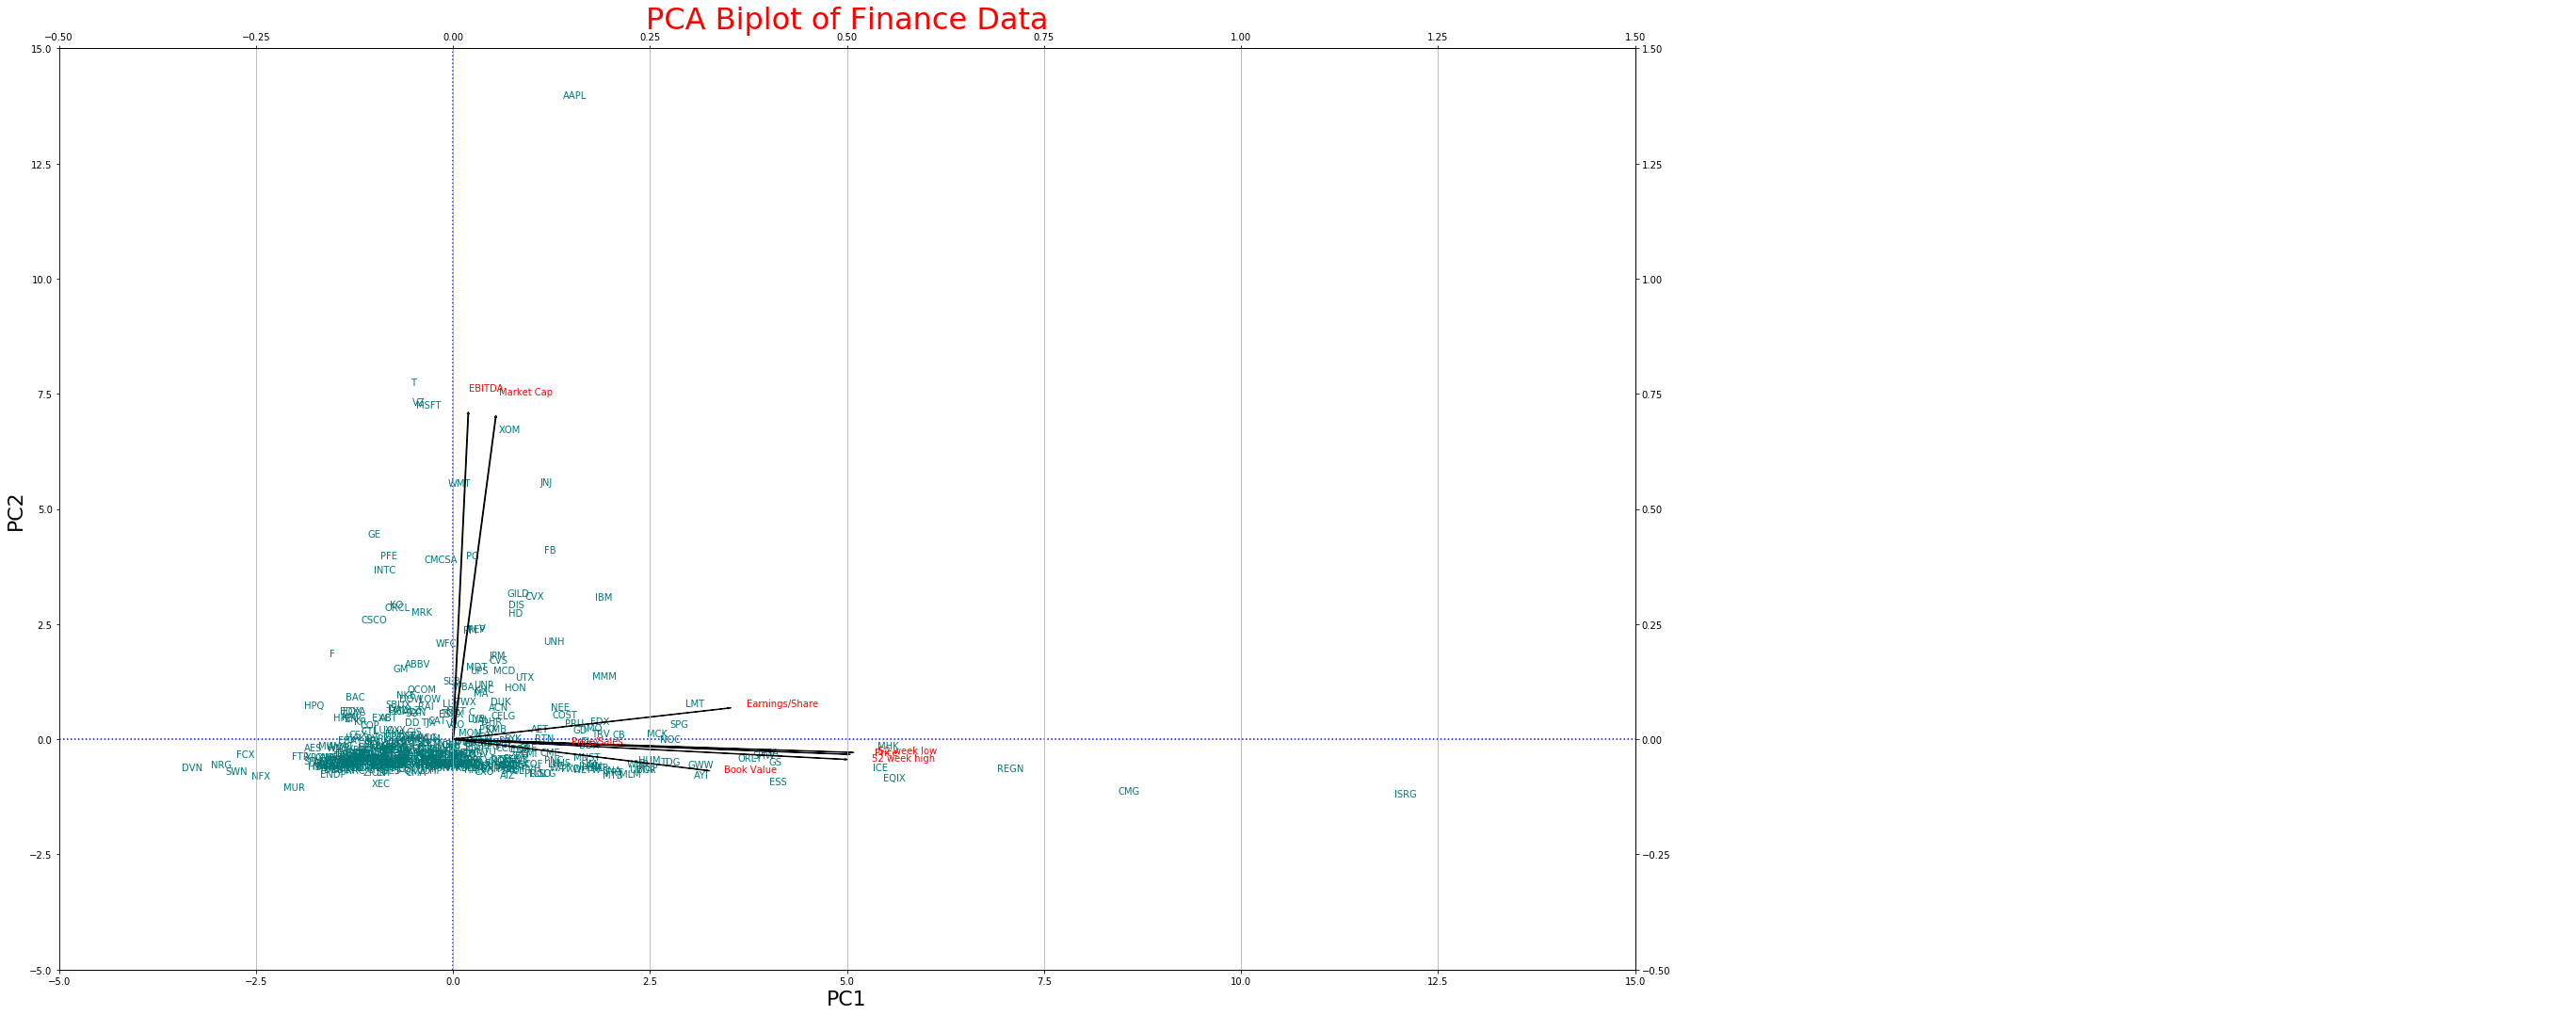

In [292]:
fig , ax1 = plt.subplots(figsize=(30,18))
ax1.set_xlim(-5,15)
ax1.set_ylim(-5,15)
# Plot Principal Components 1 and 2
for i in df_pcs.index:
    ax1.annotate(i, (df_pcs.PC1.loc[i], df_pcs.PC2.loc[i]), ha='center', color = '#007777')
# Plot reference lines
ax1.hlines(0,-5,15, linestyles='dotted', colors='blue')
ax1.vlines(0,-5,15, linestyles='dotted', colors='blue')
ax1.set_xlabel('PC1', fontsize=22)
ax1.set_ylabel('PC2', fontsize=22)
# Plot Principal Component loading vectors, using a second y-axis.
ax2 = ax1.twinx().twiny()
ax2.set_ylim(-0.5,1.5)
ax2.set_xlim(-0.5,1.5)
ax2.set_xlabel('PCA Biplot of Finance Data', color='red', fontsize=32)
# Plot labels for vectors. Variable ’a’ is a small offset parameter to separate arrow tip and text.
a = 1.07
for i in pca_loadings[['V1', 'V2']].index:
    ax2.annotate(i, (pca_loadings.V1.loc[i]*a, pca_loadings.V2.loc[i]*a), color='red')
    # Plot vectors
    ax2.arrow(0,0,pca_loadings.V1[i], pca_loadings.V2[i])
plt.grid('on')
plt.savefig('SP_Biplot',format='tiff',dpi=600)
plt.show()

### PCA HFT data

In [262]:
import warnings
warnings.filterwarnings('ignore')

In [263]:
GOOG = pd.read_csv('GOOG2018-01-30.csv')
GOOG['Date'] = 0
for i in range(len(GOOG.index)):
    GOOG['Date'][i]=GOOG['Unnamed: 0'][i][5:16]

In [264]:
GOOG_data = pd.DataFrame(scale(GOOG.iloc[:, 2:7]), index=GOOG['Date'], columns=GOOG.columns[2:7])

In [265]:
GOOG_data

Open      High       Low     Close        Vol
Date                                                          
01-30 09:30  1.564928  1.637437  1.572266  1.643513   2.262124
01-30 09:31  1.605878  1.637231  1.584098  1.606026   0.959399
01-30 09:32  1.723611  1.752632  1.601030  1.602954   0.903728
01-30 09:33  1.769681  1.763467  1.722817  1.731495  -0.171203
01-30 09:34  1.728730  1.815278  1.695279  1.769904   0.411822
...               ...       ...       ...       ...        ...
02-16 15:56  0.203115  0.197635  0.210169  0.202414   0.029627
02-16 15:57  0.201270  0.196617  0.203437  0.202619   0.134988
02-16 15:58  0.164826  0.177908  0.177325  0.189713   0.726276
02-16 15:59  0.177314  0.169273  0.171614  0.163903   1.050734
02-16 16:00  0.148036  0.163105  0.158558  0.172506  11.197006

[5422 rows x 5 columns]

In [266]:
pca_loadings = pd.DataFrame(PCA().fit(GOOG_data).components_.T, index=GOOG_data.columns, 
                            columns=['V1', 'V2', 'V3', 'V4', 'V5'])
pca_loadings

V1        V2        V3        V4        V5
Open  -0.499674  0.017820  0.695914  0.007899 -0.515412
High  -0.499643  0.021762  0.023462  0.686475  0.527338
Low   -0.499706  0.014422 -0.001623 -0.726399  0.471622
Close -0.499667  0.018376 -0.717740  0.031739 -0.483568
Vol    0.036190  0.999331  0.000301 -0.005190 -0.000207

In [267]:
u, s, v = SVDtoPCA(GOOG_data)
print(v.T)

[[-4.99673705e-01 -1.78201197e-02 -6.95914078e-01  7.89921715e-03
   5.15412292e-01]
 [-4.99642936e-01 -2.17615300e-02 -2.34620705e-02  6.86474804e-01
  -5.27337887e-01]
 [-4.99706468e-01 -1.44220842e-02  1.62302483e-03 -7.26399073e-01
  -4.71621883e-01]
 [-4.99666743e-01 -1.83757757e-02  7.17739787e-01  3.17394963e-02
   4.83567657e-01]
 [ 3.61900100e-02 -9.99331383e-01 -3.00791144e-04 -5.19002648e-03
   2.06948568e-04]]


In [271]:
pca = PCA()
variances = pca.fit(GOOG_data).explained_variance_
print('Varances of GOOG data')
print(variances)
ratio = pca.fit(GOOG_data).explained_variance_ratio_
print('\nExplained variance ratio of GOOG data')
print(ratio)
cum_ratio = ratio.cumsum()
print('\nCumulative explained variance ratio of GOOG data')
print(cum_ratio)

Varances of GOOG data
[4.00412152e+00 9.96272000e-01 2.79521483e-04 2.17564124e-04
 3.17381598e-05]

Explained variance ratio of GOOG data
[8.00676604e-01 1.99217651e-01 5.58939860e-05 4.35047996e-05
 6.34646124e-06]

Cumulative explained variance ratio of GOOG data
[0.8006766  0.99989425 0.99995015 0.99999365 1.        ]


In [268]:
pca = PCA()
df_pcs = pd.DataFrame(pca.fit_transform(GOOG_data), 
                       columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'],
                      index=GOOG_data.index)
df_pcs.iloc[:,0:2]

PC1        PC2
Date                            
01-30 09:30 -3.125101   2.377008
01-30 09:31 -3.179788   1.075361
01-30 09:32 -3.305216   1.024524
01-30 09:33 -3.497636  -0.044512
01-30 09:34 -3.487392   0.538828
...               ...        ...
02-16 15:56 -0.405328   0.044278
02-16 15:57 -0.396823   0.149421
02-16 15:58 -0.328370   0.738643
02-16 15:59 -0.302802   1.062362
02-16 16:00  0.084328  11.201164

[5422 rows x 2 columns]

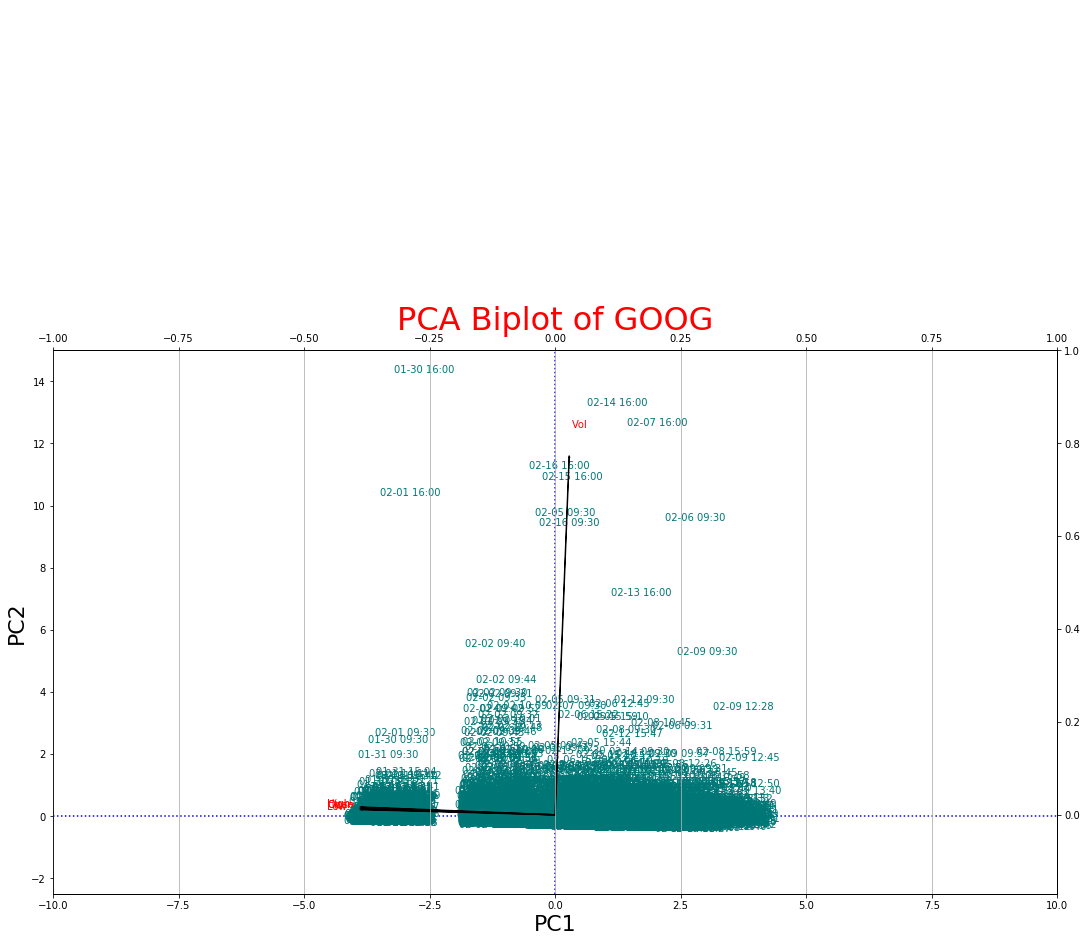

In [270]:
fig , ax1 = plt.subplots(figsize=(18,10))
ax1.set_xlim(-10,10)
ax1.set_ylim(-2.5,15)
# Plot Principal Components 1 and 2
for i in df_pcs.index:
    ax1.annotate(i, (df_pcs.PC1.loc[i], df_pcs.PC2.loc[i]), ha='center', color = '#007777')
# Plot reference lines
ax1.hlines(0,-10,10, linestyles='dotted', colors='blue')
ax1.vlines(0,-2.5,15, linestyles='dotted', colors='blue')
ax1.set_xlabel('PC1', fontsize=22)
ax1.set_ylabel('PC2', fontsize=22)
# Plot Principal Component loading vectors, using a second y-axis.
ax2 = ax1.twinx().twiny()
ax2.set_ylim(-0.17,1)
ax2.set_xlim(-1,1)
ax2.set_xlabel('PCA Biplot of GOOG', color='red', fontsize=32)
# Plot labels for vectors. Variable ’a’ is a small offset parameter to separate arrow tip and text.
a = 1.07
for i in pca_loadings[['V1', 'V2']].index:
    ax2.annotate(i, (pca_loadings.V1.loc[i]/1.1, pca_loadings.V2.loc[i]/1.2), color='red')
    # Plot vectors
    ax2.arrow(0,0,pca_loadings.V1[i]/1.3, pca_loadings.V2[i]/1.3)
plt.grid('on')
plt.savefig('GOOG_Biplot',format='tiff',dpi=600)
plt.show()

#### Cheaper stocks price will contribute more to the first PC than expensive ones. Higher trading volume will contribute more to the second PC than lower trading volume. The outliers on the top are most high volume trading which most of them are happened in market open or close time. The outliers on the left are more expensive stock price.

In [272]:
GS = pd.read_csv('GS_n.csv')
WMT = pd.read_csv('WMT_n.csv')
TIF = pd.read_csv('TIF_n.csv')
GS['Unnamed: 0'] = 'GS'
WMT['Unnamed: 0'] = 'WMT'
TIF['Unnamed: 0'] = 'TIF'

In [273]:
data_2019 = pd.concat([GS, WMT, TIF])
data_2019 = data_2019.rename(columns={"Unnamed: 0": "Ticker"})
data_2019 = data_2019.reset_index()
data_2019

index Ticker             Date  marketAverage  marketChangeOverTime  \
0          0     GS    2/1/2019 9:30        197.973              0.000000   
1          1     GS    2/1/2019 9:31        198.225              0.001273   
2          2     GS    2/1/2019 9:32        198.250              0.001399   
3          3     GS    2/1/2019 9:33        198.622              0.003278   
4          4     GS    2/1/2019 9:34        198.770              0.004026   
...      ...    ...              ...            ...                   ...   
17545   5845    TIF  2/22/2019 15:55         92.730              0.006261   
17546   5846    TIF  2/22/2019 15:56         92.760              0.006587   
17547   5847    TIF  2/22/2019 15:57         92.717              0.006120   
17548   5848    TIF  2/22/2019 15:58         92.707              0.006012   
17549   5849    TIF  2/22/2019 15:59         92.706              0.006001   

       marketClose  marketHigh  marketLow  marketNotional  \
0          198.000     198.100     197.66    1.102078e+07   
1          198.000     198.570     197.83    4.022580e+06   
2          198.475     198.490     197.97    1.755706e+06   
3          198.613     198.740     198.34    3.384128e+06   
4          198.867     198.930     198.43    8.162708e+06   
...            ...         ...        ...             ...   
17545       92.750      92.760      92.70    9.583648e+05   
17546       92.720      92.790      92.72    7.654597e+05   
17547       92.700      92.735      92.69    8.528093e+05   
17548       92.755      92.760      92.68    1.301336e+06   
17549       92.710      92.770      92.64    2.602722e+06   

       marketNumberOfTrades  marketOpen  marketVolume  
0                        87     198.000         55668  
1                       238     198.050         20293  
2                        96     198.122          8856  
3                        98     198.530         17038  
4                       137     198.630         41066  
...                     ...         ...           ...  
17545                   136      92.700         10335  
17546                   135      92.760          8252  
17547                   119      92.725          9198  
17548                   161      92.690         14037  
17549                   307      92.770         28075  

[17550 rows x 12 columns]

In [274]:
data_2019['Time'] = 0
for i in range(len(data_2019.index)):
    data_2019['Time'][i] = data_2019['Date'][i][0:4] + data_2019['Date'][i][9:15]

In [275]:
data_2019 = data_2019.set_index(['Time', 'Ticker'])

In [276]:
data_2019 = pd.DataFrame(scale(data_2019.loc[:,['marketClose',
                                                'marketHigh', 
                                                'marketLow', 
                                                'marketOpen', 
                                                'marketVolume']]),
                         index=data_2019.index,
                         columns=['Close','High','Low','Open','Volume'])

In [278]:
GS_pca_loadings = pd.DataFrame(PCA().fit(data_2019[data_2019.index.get_level_values('Ticker')=='GS']).components_.T,
                              index=data_2019.columns, columns=['V1', 'V2', 'V3', 'V4', 'V5'])
print('GS PCs matrix')
GS_pca_loadings

GS PCs matrix


V1        V2        V3        V4        V5
Close  -0.003880 -0.500047  0.138309  0.788101 -0.331217
High   -0.002666 -0.498726  0.562891 -0.145024  0.642951
Low    -0.005593 -0.501007 -0.807504 -0.046867  0.307737
Open   -0.004160 -0.500151  0.109351 -0.596379 -0.618229
Volume  0.999965 -0.008153 -0.002024 -0.000072 -0.000422

In [279]:
WMT_pca_loadings = pd.DataFrame(PCA().fit(data_2019[data_2019.index.get_level_values('Ticker')=='WMT']).components_.T,
                              index=data_2019.columns, columns=['V1', 'V2', 'V3', 'V4', 'V5'])
print('WMT PCs matrix')
WMT_pca_loadings

WMT PCs matrix


V1        V2        V3        V4        V5
Close   0.009429 -0.500057  0.144599 -0.534390 -0.665863
High    0.009706 -0.500176  0.512748  0.694202 -0.070020
Low     0.009034 -0.498907 -0.829113  0.252044 -0.007527
Open    0.009364 -0.500507  0.169567 -0.411077  0.742743
Volume  0.999824  0.018767 -0.000438 -0.000127  0.000071

In [280]:
TIF_pca_loadings = pd.DataFrame(PCA().fit(data_2019[data_2019.index.get_level_values('Ticker')=='TIF']).components_.T,
                              index=data_2019.columns, columns=['V1', 'V2', 'V3', 'V4', 'V5'])
print('TIF PCs matrix')
TIF_pca_loadings

TIF PCs matrix


V1        V2        V3        V4        V5
Close   0.005397 -0.488726  0.872128 -0.003957 -0.022232
High    0.005443 -0.502506 -0.267385  0.697915  0.434602
Low     0.003997 -0.504897 -0.276121 -0.715733  0.395660
Open    0.004702 -0.503606 -0.302744  0.024996 -0.808752
Volume  0.999952  0.009759 -0.000724 -0.001034 -0.000025

In [281]:
data_2019_df_pcs = pd.DataFrame(pca.fit_transform(data_2019), 
                                columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'], 
                                index=data_2019.index)
print('Newdata of 2019 HFT data')
data_2019_df_pcs

Newdata of 2019 HFT data


PC1       PC2       PC3       PC4       PC5
Time       Ticker                                                  
2/1/9:30   GS     -2.712555  2.994316  0.002349  0.002326 -0.001437
2/1/9:31   GS     -2.867475  0.870950 -0.000187  0.007824  0.004056
2/1/9:32   GS     -2.921531  0.184724  0.006271  0.002770  0.002854
2/1/9:33   GS     -2.899394  0.676797  0.002287  0.002405  0.000809
2/1/9:34   GS     -2.805557  2.119860  0.004649  0.002273  0.001649
...                     ...       ...       ...       ...       ...
2/22 15:55 TIF     1.446012 -0.029977  0.000188 -0.000392  0.000474
2/22 15:56 TIF     1.436483 -0.154980 -0.000838  0.000292 -0.000077
2/22 15:57 TIF     1.441882 -0.098284 -0.000613 -0.000165 -0.000275
2/22 15:58 TIF     1.461738  0.192268  0.000502 -0.000303  0.000514
2/22 15:59 TIF     1.520336  1.035093 -0.000325  0.000659 -0.001003

[17550 rows x 5 columns]

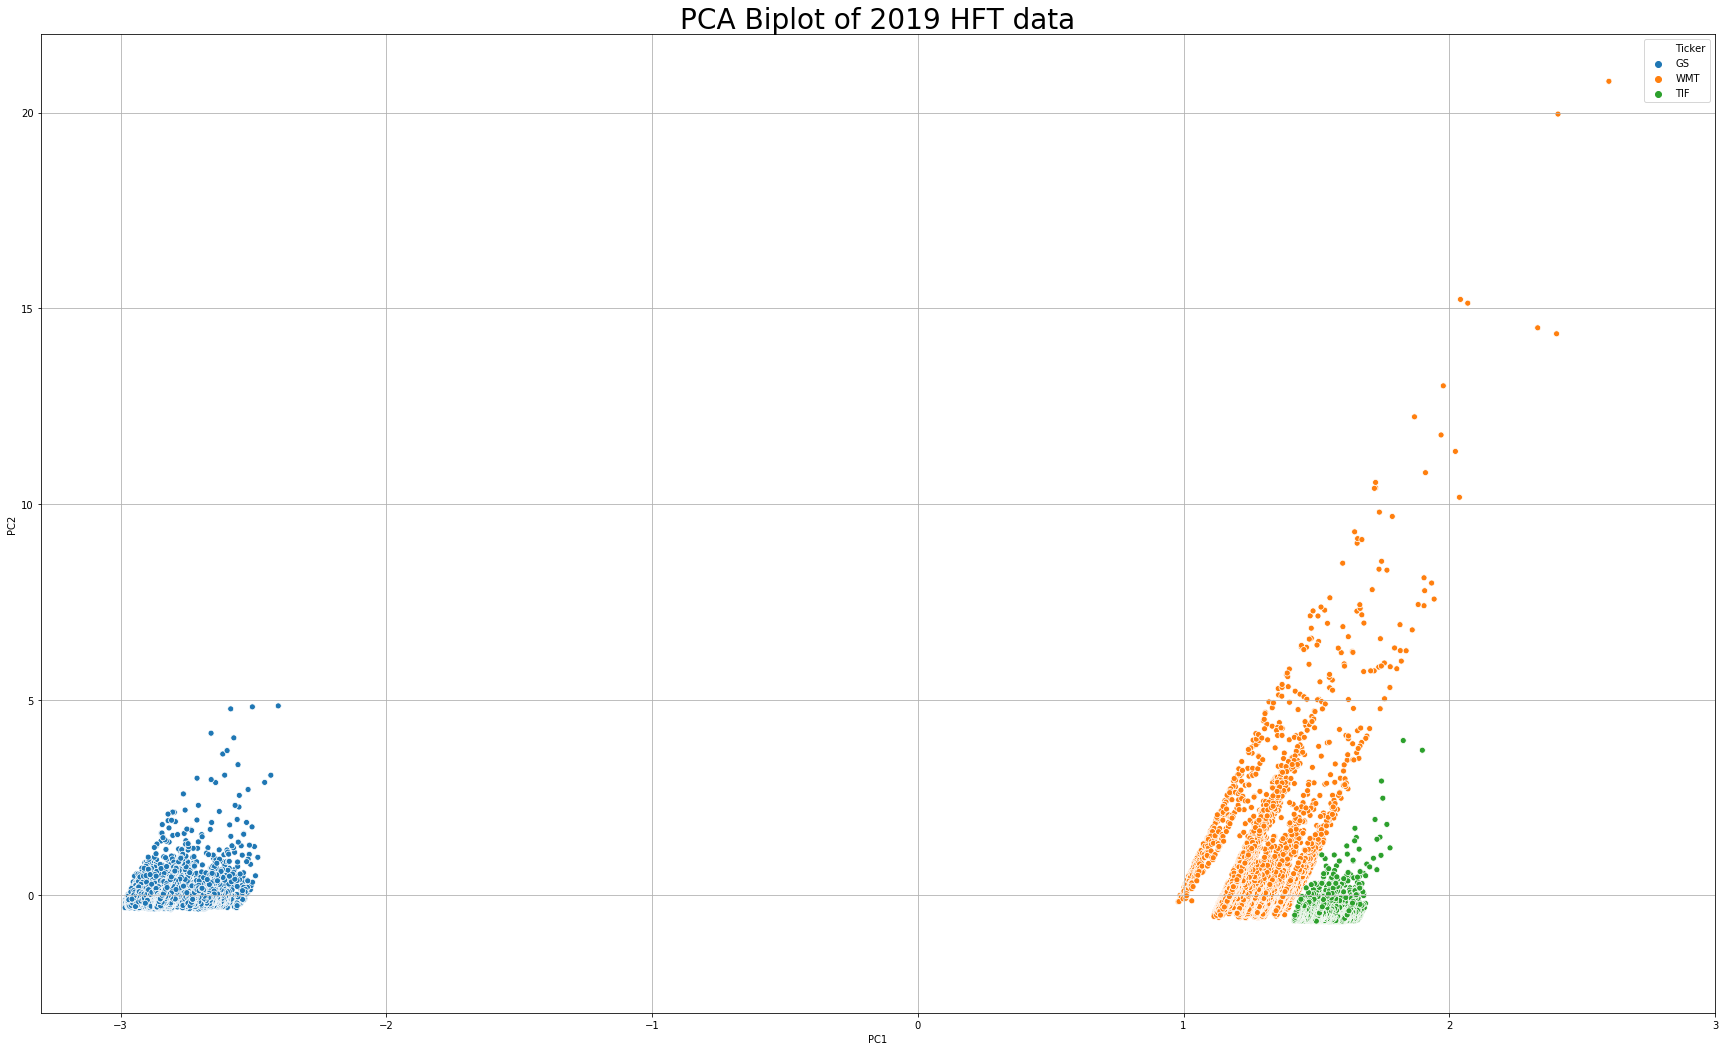

In [282]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(30,18))
ax = sns.scatterplot(x='PC1', y='PC2', hue=data_2019_df_pcs.index.get_level_values('Ticker'),
                    data=data_2019_df_pcs)
ax.set_xlim(-3.3, 3)
ax.set_ylim(-3, 22)
ax.set_title('PCA Biplot of 2019 HFT data', fontsize=28)
plt.grid('on')
plt.savefig('HFT_2019_Biplot',format='tiff',dpi=600)
plt.show()